In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
#pandas_datareader to get data directly from Yahoo finance

from pandas_datareader import data as pdr

# download dataframe using pandas_datareader
df = pdr.get_data_yahoo("TOFB", start="2016-01-01")

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,4.17,4.17,4.17,4.17,300,4.17
2016-01-05,4.01,4.01,4.01,4.01,300,4.01
2016-01-06,4.01,4.01,4.01,4.01,0,4.01
2016-01-07,4.03,3.94,4.00,3.98,3600,3.98
2016-01-08,4.04,3.95,3.95,4.04,1500,4.04


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-09,2.96,2.96,2.96,2.96,500,2.96
2021-04-12,2.96,2.96,2.96,2.96,0,2.96
2021-04-13,2.90,2.85,2.90,2.85,1500,2.85
2021-04-14,2.99,2.81,2.87,2.81,1700,2.81
2021-04-15,2.90,2.75,2.81,2.75,3583,2.75


In [5]:
#use open stock for prediction

# The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 
#If an integer, then the result will be a 1-D array of that length.

df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1330, 1)


array([[4.17000008],
       [4.01000023],
       [4.01000023],
       [4.        ],
       [3.95000005]])

In [6]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [7]:
dataset_train.shape

(1064, 1)

In [8]:
dataset_test.shape

(316, 1)

In [9]:
#This estimator scales and translates each feature individually such that it is in the given range 
# on the training set, e.g. between zero and one.\

#LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) 
#or tanh activation functions are used. 
 
# MinMaxScaler preprocessing class from the scikit-learn library.

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[1.        ],
       [0.94952686],
       [0.94952686],
       [0.94637222],
       [0.93059936]])

In [10]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.27129337],
       [0.23974763],
       [0.2681388 ],
       [0.24921134],
       [0.2429022 ]])

In [11]:
#Create one continuous series Create the data to get 50 timestamps from the current instance:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [12]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[1.        , 0.94952686, 0.94952686, 0.94637222, 0.93059936,
        0.9589905 , 0.85173501, 0.78864351, 0.89905358, 0.84542587,
        0.85488958, 0.89274443, 0.74132487, 0.76971609, 0.72870659,
        0.72870659, 0.72870659, 0.72870659, 0.74132487, 0.74132487,
        0.74132487, 0.74132487, 0.58359617, 0.48264982, 0.51735018,
        0.48580439, 0.47949525, 0.54258675, 0.52996846, 0.50473182,
        0.47949525, 0.42586747, 0.40378547, 0.40378547, 0.50473182,
        0.46687697, 0.46687697, 0.56782332, 0.62460567, 0.66246052,
        0.58359617, 0.58359617, 0.57728703, 0.83596216, 0.90851736,
        0.88328072, 0.79179809, 0.82965301, 0.63722395, 0.63091481]])

In [13]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.27129337, 0.23974763, 0.2681388 , 0.24921134, 0.2429022 ,
        0.25552048, 0.28075709, 0.28075709, 0.25236591, 0.27444794,
        0.27444794, 0.25236591, 0.25552048, 0.23974763, 0.24605677,
        0.23974763, 0.25236591, 0.25867509, 0.25552048, 0.21766563,
        0.28075709, 0.25236591, 0.20189274, 0.16719242, 0.22712934,
        0.17981074, 0.18927445, 0.18927445, 0.18296531, 0.17665613,
        0.16088327, 0.16088327, 0.16088327, 0.17665613, 0.17350156,
        0.16403784, 0.15141956, 0.1577287 , 0.18296531, 0.14195585,
        0.07886435, 0.15141956, 0.1104101 , 0.08517349, 0.0630915 ,
        0.05678232, 0.        , 0.1577287 , 0.08201892, 0.11356467]])

In [14]:
# Reshape features for LSTM Layer

# NumPy Array manipulation: reshape() function
#The reshape() function is used to give a new shape to an array without changing its data. 
#Array to be reshaped. The new shape should be compatible with the original shape. 


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
#Import all deep learing learning library to create LSTM model
import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [16]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))


In [17]:
model.add(Dense(units=1))

In [18]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
#Fit the model

model.fit(x_train, y_train, epochs=20, batch_size=32)

Train on 1014 samples
Epoch 1/20
1014/1014 [==============================] - 11s 11ms/sample - loss: 0.0234
Epoch 2/20
1014/1014 [==============================] - 6s 6ms/sample - loss: 0.0073
Epoch 3/20
1014/1014 [==============================] - 6s 6ms/sample - loss: 0.0042
Epoch 4/20
1014/1014 [==============================] - 7s 7ms/sample - loss: 0.0041
Epoch 5/20
1014/1014 [==============================] - 7s 7ms/sample - loss: 0.0037
Epoch 6/20
1014/1014 [==============================] - 9s 9ms/sample - loss: 0.0036
Epoch 7/20
1014/1014 [==============================] - 8s 8ms/sample - loss: 0.0037
Epoch 8/20
1014/1014 [==============================] - 8s 8ms/sample - loss: 0.0033
Epoch 9/20
1014/1014 [==============================] - 8s 8ms/sample - loss: 0.0034
Epoch 10/20
1014/1014 [==============================] - 8s 8ms/sample - loss: 0.0032
Epoch 11/20
1014/1014 [==============================] - 8s 8ms/sample - loss: 0.0034
Epoch 12/20
1014/1014 [================

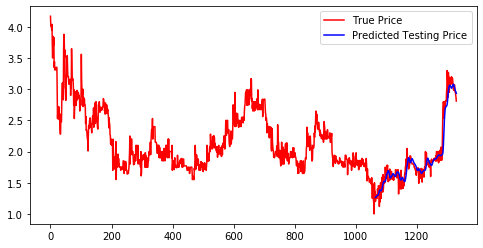

In [20]:
#Data visualization 
#Load and process the test data (which is treated as the actual data here):

predictions = model.predict(x_test)
#Since we scaled our data, the predictions made by the LSTM are also scaled. 
#We need to reverse the scaled prediction back to their actual values. 
#To do so, we can use the ìnverse_transform method of the scaler object we created during training. 

#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

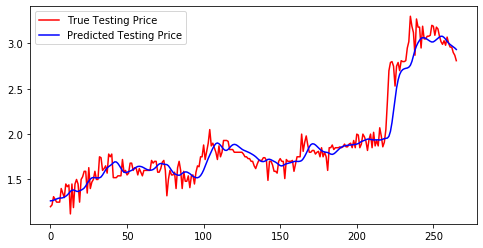

In [21]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [22]:
#Predict for next 5 days

x = x_test[-1]
num_timesteps = 5
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[2.9335408, 3.237935, 4.04034, 5.2807302, 6.7104316]
